# Subplots

In [1]:
# set our rendering backend to the nbAgg backend, then import our pyplot module and NumPy
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


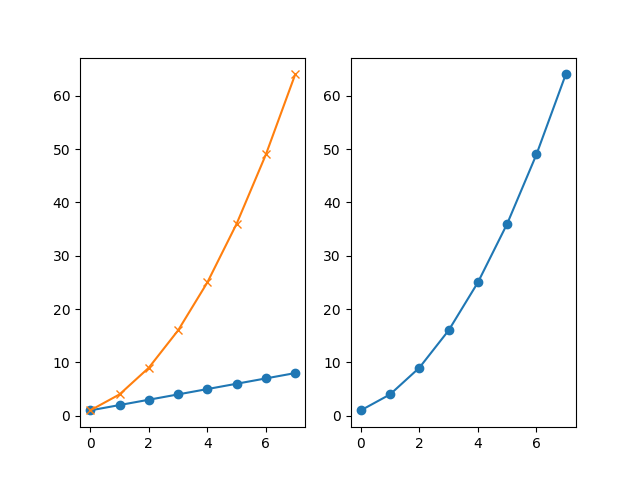

In [2]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [3]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [4]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


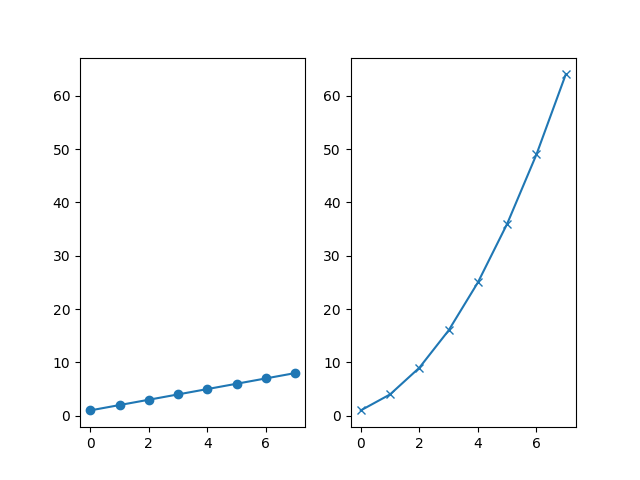

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


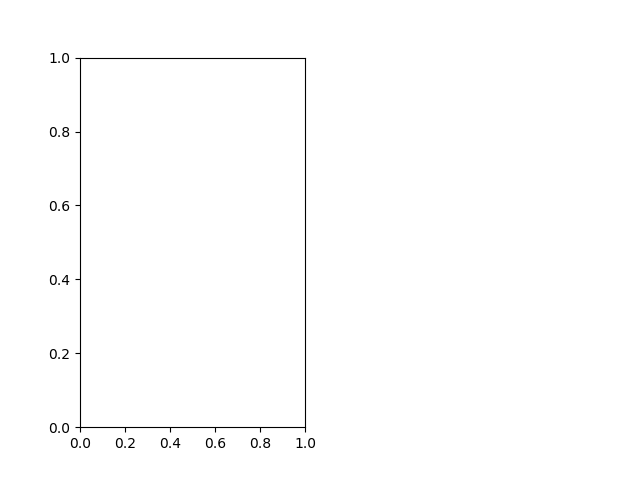

True

In [6]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


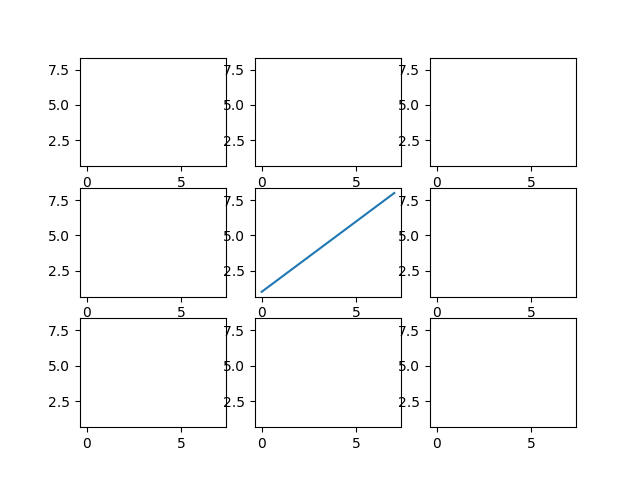

In [7]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [8]:
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [9]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

Probability function can be visualized as a curve, where the y-axis holds the probability a 
given value would occur, and the x-axis is the value itself. This is called a probability 
density function. The y-axis values are limited to between zero and one, where zero means 
there's no chance of a given value occurring and one means that the value will always occur.
The x-axis values are labeled in terms of the distribution function. In the case of the normal 
distribution, this is usually in terms of standard deviations. So a histogram is just a bar chart 
where the x-axis is a given observation and the y-axis is the frequency with which that observation 
occurs. So we should be able to plot a given probability distribution by sampling from it. 


<IPython.core.display.Javascript object>


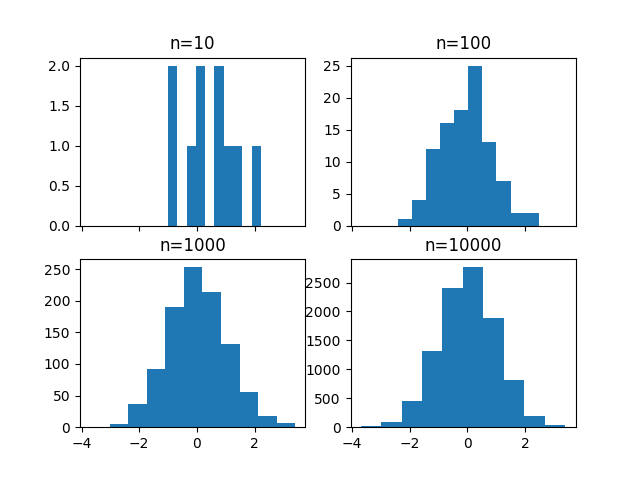

In [10]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


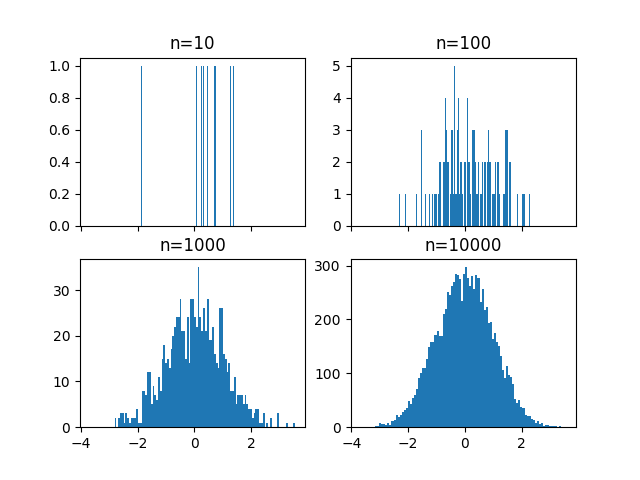

In [11]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


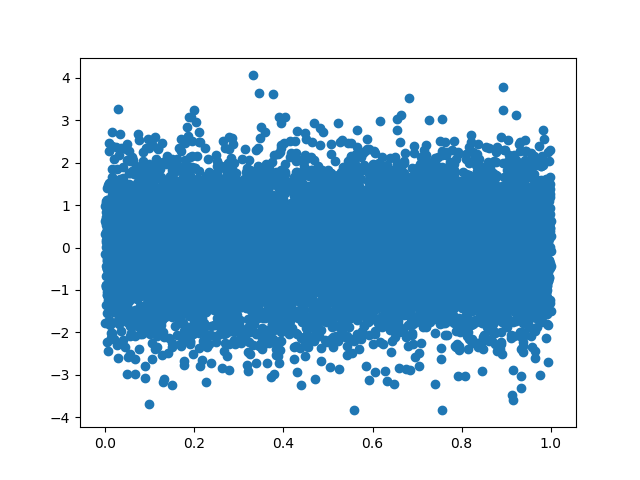

In [12]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


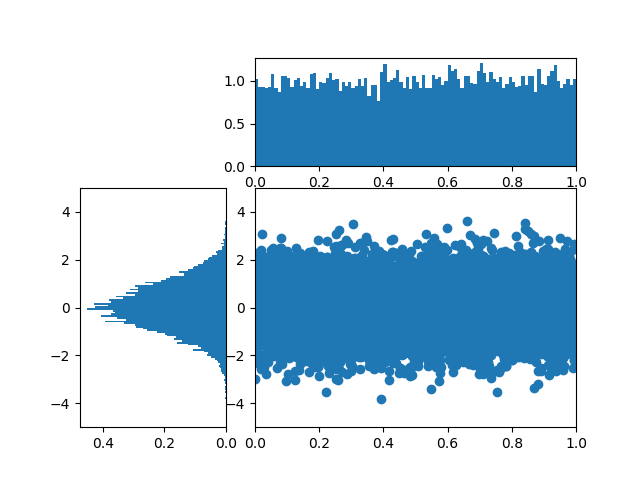

In [13]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [14]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [15]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [16]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

In [17]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

# Box and Whisker Plots

In [18]:
# The box plot simultaneously shows, for each sample, the median of each value, the minimum and maximum of 
# the samples, and the interquartile range. 
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [19]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.966235,-0.000731,0.501636
std,1.387566,1.006076,0.289573
min,0.010198,-3.613339,0.000013
25%,0.935355,-0.685853,0.247988
50%,1.669494,0.004388,0.505948
75%,2.662717,0.670873,0.757318
max,10.750748,3.747071,0.999993


Like standard deviation, the interquartile range is a measure of variability of data. And it's common to plot 
this using a box plot. In a box plot, the mean, or the median, of the data is plotted as a straight line. 
Two boxes are formed, one above, which represents the 50% to 75% data group, and one below, which represents 
the 25% to 50% data group. Thin lines which are capped are then drawn out to the minimum and maximum values. 

<IPython.core.display.Javascript object>


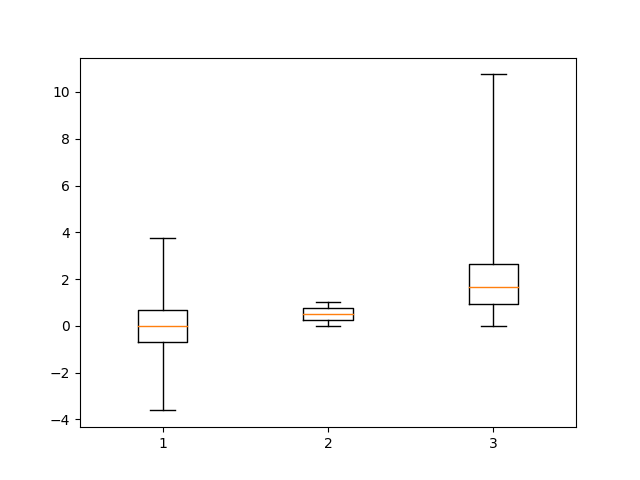

In [20]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
# It's common practice by some to use an underscore when unpacking values which you don't 
# care about and won't use later. 
_ = plt.boxplot(df['normal'], whis='range')

In [21]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

<IPython.core.display.Javascript object>


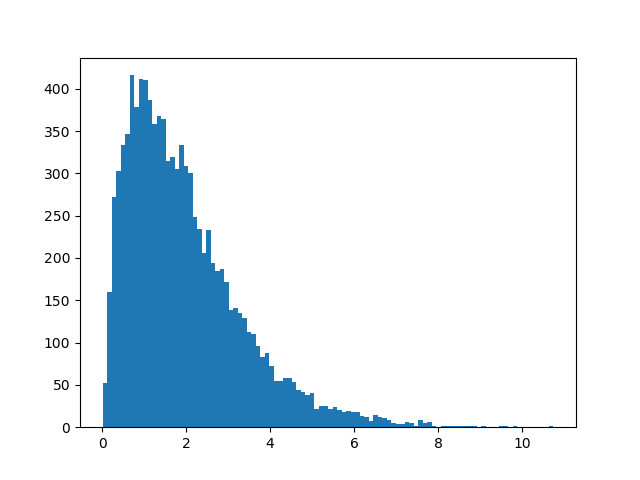

In [22]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


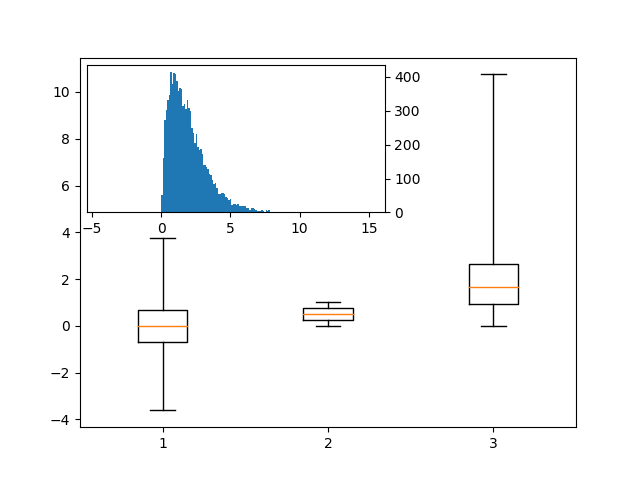

In [23]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
# An inset plot showing a distribution as a histogram layered on top of a box plot. 
plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [24]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


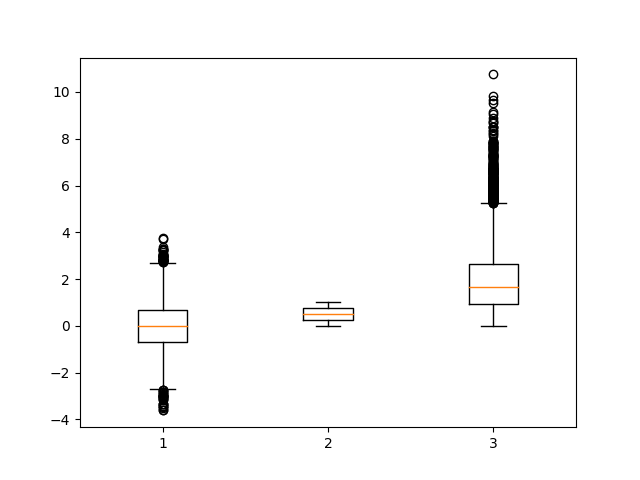

In [25]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


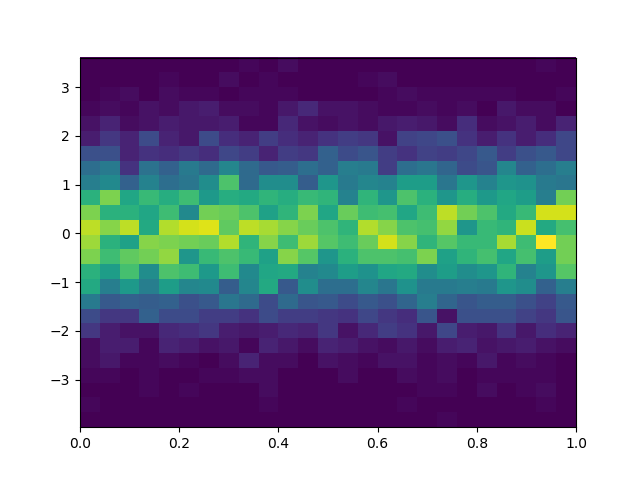

In [26]:
# Heatmaps are a way to visualize three-dimensional data and to take advantage of spatial proximity of those dimensions. 
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


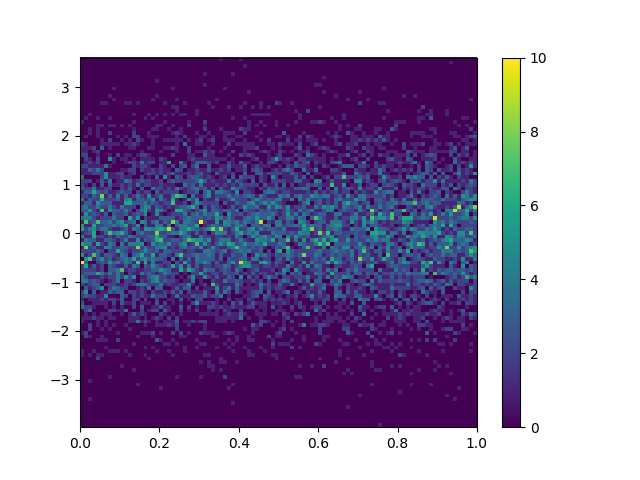

In [27]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)

In [28]:
# add a colorbar legend
plt.colorbar()

# Animations

In [29]:
import matplotlib.animation as animation
#  Set cut off to 100 then randomly pick 100 numbers and put them into a variable. 
n = 100
x = np.random.randn(n)

Since we want all of our bins set and evenly spaced, because we're redrawing the animation in each clock tick, 
we can use the NumPy arange function. This will ensure that the bins don't change. We use the balance of minus 
4 to plus 4, in half-step increments. We also need to set the axis values since otherwise, the histogram will 
continually autoscale between frames which could be annoying. So I'll just hard code some values here, 
often the bin sizes and use 30 as an x and a couple of labels and titles to make the chart look a little better. 

In [30]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


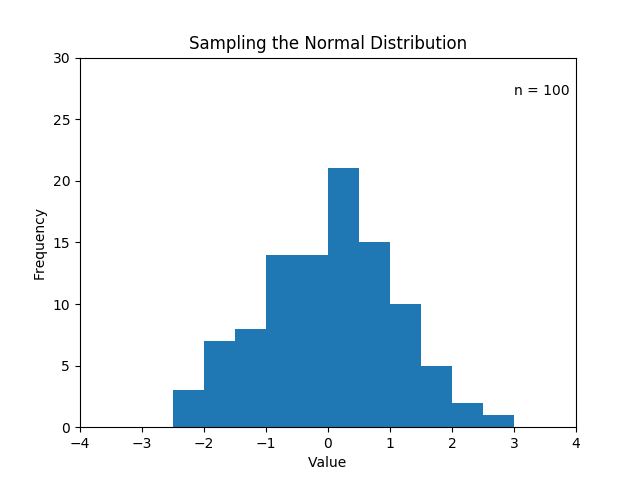

In [31]:
# example of how sampling from a distribution an be used with an animation. 
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

Interactivity and animation are very similar in Matplotlib. For interactivity though, we have to head down to the 
artist layer a bit more. In particular, we have to reference the canvas object of the current figure. The canvas 
object handles all of the drawing events and it's tightly connected with a given back end. Moving a mouse pointer for instance would create an event, clicking will create an event, pressing on keys on the keyboard would create an event. And this didn't only happen at the hardware level such as IRQ interrupts but at the software level as well. In fact, event driven programming has infiltrated most of the ways computer programmers regularly engage with software. From HTML and JavaScript, down to lower level C code. You can think of an event as a piece of data which is associated with a function call. And when the event happens, the software environment, in our case this is Matplotlibs backend, will call the function with the relevant data. 

Create a new function called onclick. And this takes one parameter, which is the event object. So what's in an event 
object? Well, that depends on the type of the event. Here we're going to deal with mouse events. And they have both an 
x and a y value as far as the location of the mouse in pixels on the canvas. As well as an x and a y values first 
location of the mouse relative to our data and axis. So for our onclick we'll clear the current axis then plot our 
data then set the title of the plot to be variance location of the mouse. Finally, we have to connect this events 
to an event listener and this process is usually called wiring it up. In this case very easy, get the current figure 
and its canvas subject then call the mpl_connect function. Passing in the string for button_press_event as well as 
reference to the function onclick, which will be call when the event is detected. 

<IPython.core.display.Javascript object>


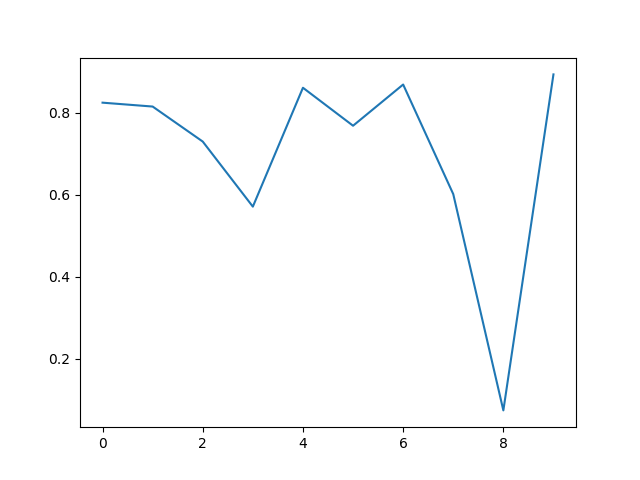

7

In [32]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [33]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.389366,Germany,0.386498
1,0.887052,China,0.472722
2,0.594816,Brazil,0.441781
3,0.529041,Canada,0.384348
4,0.004164,USA,0.799390
5,0.132111,UK,0.241748
6,0.309960,Chile,0.827061
7,0.431652,India,0.773614
8,0.884977,Iraq,0.250962
9,0.396694,Mexico,0.798843


Note that we've added a new argument here called picker and set it to 5. This informs the Matplotlib backend 
that the mouse doesn't have to click directly on a rendered object that can be up to 5 pixels away and it 
should find the closest object. 

<IPython.core.display.Javascript object>


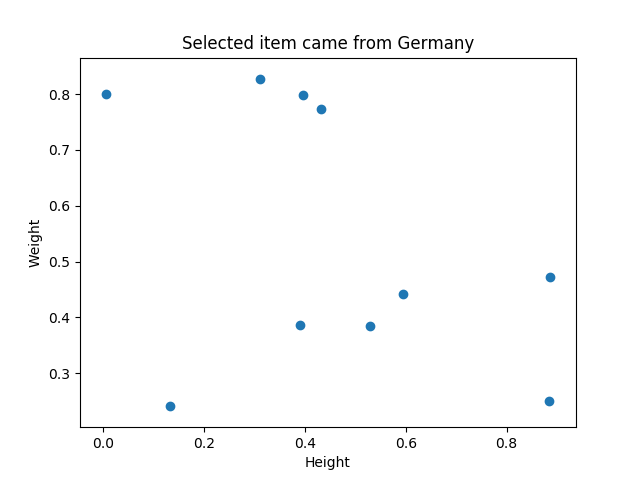

In [34]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

We'll create a function called onpick, which takes on an event. This event is a pick event which has different 
data than the most event. In particular, it's got an index value which happens to correspond to our index and the dataframe. 

In [36]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

8